In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thomas')

In [2]:
from scipy.optimize import curve_fit

In [3]:
def line(x,a,b):
    return a + b*x

In [4]:
N = 10
x = np.arange(N)

par = np.array([2.,1.])

y = line(x,par[0],par[1])

sigma_y = 0.5
y_err = np.repeat(sigma_y,N)

y_d = y + np.random.randn(N)+y_err

<ErrorbarContainer object of 3 artists>

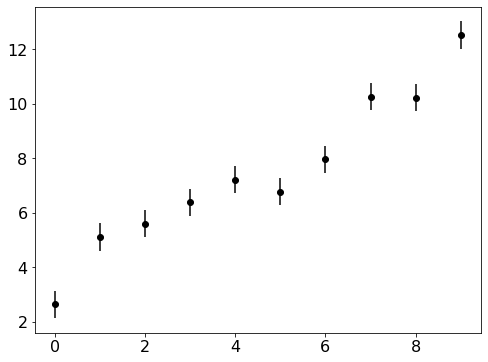

In [5]:
plt.errorbar(x,y_d,yerr=y_err,linestyle='',marker='o')

In [6]:
result = curve_fit(line,x,y_d,p0=np.array([2.,1.]),sigma=y_err)

In [7]:
fit_par = result[0]
fit_cov = result[1]

In [8]:
# fit parameters
fit_par

array([3.31024332, 0.92285929])

In [9]:
# fit covariance
fit_cov

array([[ 0.21276525, -0.03359451],
       [-0.03359451,  0.00746545]])

In [10]:
# fit uncertainties
fit_err = np.sqrt(np.diag(fit_cov))
fit_err

array([0.46126484, 0.08640282])

In [11]:
def BG_counts(x1,x2,a,b):
    return a*(x2-x1) + 0.5*b*(x2**2-x1**2)

In [12]:
def BG_counts_err(x1,x2,a,b,sigma_a,sigma_b,sigma_ab):
    return np.sqrt((sigma_a*(x2-x1))**2 + (0.5*sigma_b*(x2**2-x1**2))**2 + 2*(x2-x1)*0.5*(x2**2-x1**2)*sigma_ab)

In [13]:
BG_counts(4,6.,fit_par[0],fit_par[1])

15.849079491632676

In [14]:
BG_counts_err(4,6.,fit_par[0],fit_par[1],fit_err[0],fit_err[1],fit_cov[0,1])

0.5038106957222228

In [15]:
N_band = 1000
samples = np.random.multivariate_normal(fit_par,fit_cov,size=N_band)

In [16]:
samples.shape

(1000, 2)

In [17]:
fit_band = np.zeros((N,N_band))
for i in range(N_band):
    fit_band[:,i] = line(x,samples[i,0],samples[i,1])

In [18]:
fit_band.shape

(10, 1000)

<ErrorbarContainer object of 3 artists>

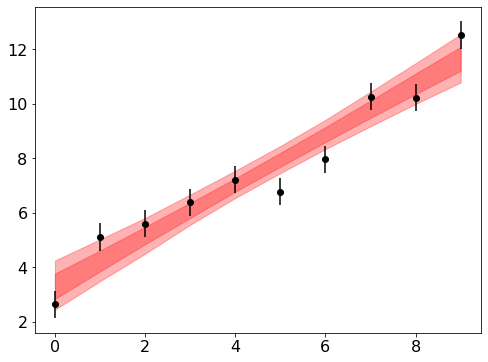

In [19]:
for level in [68.3,95.4]:
    plt.fill_between(x,
                     np.percentile(fit_band,50-level/2,axis=1),
                     np.percentile(fit_band,50+level/2,axis=1),
                     alpha=0.3,color='red')

plt.errorbar(x,y_d,yerr=y_err,linestyle='',marker='o')